In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy.io
import glob,csv

from pykrige.ok import OrdinaryKriging
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
data=scipy.io.loadmat('Th_diss.mat')
NEMO_dep=data['NEMO_dep']
Pa_diss=data['Th_diss']
lons=data['lons']
lats=data['lats']
Pa_ini=np.empty([1,31,149,182])

coordinate_name=glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/test/EXP00/coordinates*.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]

In [3]:
print Pa_diss.shape

(31, 25)


In [4]:
'input boundinglat'
latlim=55

#Find variogram model

In [5]:
def find(layer):
        x=lons[layer,:]
        y=lats[layer,:]
        z=Pa_diss[layer,:]
        
        x_ma=np.ma.masked_where(z<= 1e-200,x)
        x_ma=np.ma.masked_where(np.isnan(x_ma),x_ma)
        y_ma=np.ma.masked_where(z<= 1e-200,y)
        y_ma=np.ma.masked_where(np.isnan(y_ma),y_ma)
        z_ma=np.ma.masked_where(z<= 1e-200,z)
        z_ma=np.ma.masked_where(np.isnan(y_ma),z_ma)   
        m = Basemap(projection='npstere',boundinglat=latlim,lon_0=0,resolution='l')

        x_dis,y_dis = m(x_ma, y_ma)
        x_lon,y_lat = m(nav_lon, nav_lat)
        a,b=m(0,90)
        
        xx_lon=np.empty([149,182])
        yy_lat=np.empty([149,182])
        xx_dis=np.empty([len(x_dis)])
        yy_dis=np.empty([len(x_dis)])

        for j in range (182):
            for i in range (149):
                xx_lon[i,j]=x_lon[i,j]-a
                yy_lat[i,j]=y_lat[i,j]-b
        
        xx_lon_ma=np.ma.masked_where(nav_lat<45,xx_lon)
        yy_lat_ma=np.ma.masked_where(nav_lat<45,yy_lat)

        xx_dis=np.ma.masked_where(np.isnan(xx_dis),xx_dis)
        yy_dis=np.ma.masked_where(np.isnan(yy_dis),yy_dis)
        z_ma=np.ma.masked_where(np.isnan(yy_dis),z_ma)
        
        for k in range (len(xx_dis)):
            xx_dis[k]=x_dis[k]-a
            yy_dis[k]=y_dis[k]-b        

        xxx_dis=xx_dis.compressed()
        yyy_dis=yy_dis.compressed()
        zzz_ma=z_ma.compressed()
        
        for applen in range(len(xxx_dis)):
            x_all.append(xxx_dis[applen])
        #for applen in range(len(zzz_ma)):
            y_all.append(yyy_dis[applen])
            z_all.append(zzz_ma[applen])

In [6]:
what=np.empty([31,len(Pa_diss[0,:]),len(Pa_diss[0,:])])
            #layer,distance,variance
whatt=np.empty([31,len(Pa_diss[0,:]),len(Pa_diss[0,:])])
x_all=[]#np.empty([31,len(Pa_diss[0,:])])
            #layer,x,y
y_all=[]#np.empty([31,len(Pa_diss[0,:])])
z_all=[]#np.empty([31,len(Pa_diss[0,:])])

for i in range (26):
    find(i)

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'linear' Variogram Model
Slope: 8.2173922716e-09
Nugget: 0.0234439760759 



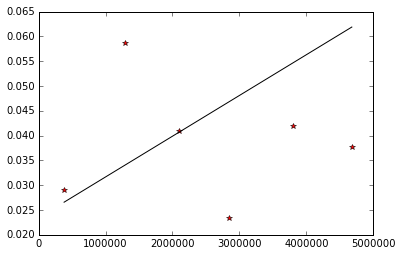

/home/xiaoxiny/anaconda/lib/python2.7/site-packages/pykrige/core.py:239: RuntimeWarning: invalid value encountered in sqrt
  sigma[n] = np.sqrt(ss_)
/home/xiaoxiny/anaconda/lib/python2.7/site-packages/pykrige/core.py:243: RuntimeWarning: divide by zero encountered in divide
  epsilon = delta/sigma


Calculating statistics on variogram model fit...
Q1 = nan
Q2 = nan
cR = nan 

Updating variogram mode...
Using 'linear' Variogram Model
Slope: 8.61601398198e-09
Nugget: 0.020032728072 



/home/xiaoxiny/anaconda/lib/python2.7/site-packages/pykrige/core.py:243: RuntimeWarning: invalid value encountered in divide
  epsilon = delta/sigma
/home/xiaoxiny/anaconda/lib/python2.7/site-packages/pykrige/core.py:257: RuntimeWarning: divide by zero encountered in log
  return Q2 * np.exp(np.sum(np.log(sigma**2))/sigma.shape[0])


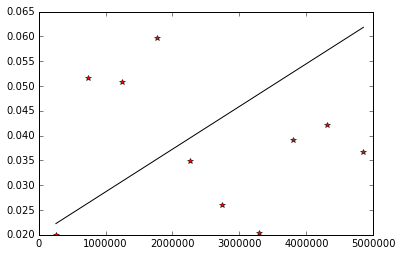

Calculating statistics on variogram model fit...
Q1 = nan
Q2 = nan
cR = nan 



In [7]:
OK = OrdinaryKriging(x_all,y_all, z_all, variogram_model='linear', verbose=True, enable_plotting=True)
OK.update_variogram_model('linear',variogram_parameters=None,nlags=10,anisotropy_angle=0)

In [7]:
'''Input slope and intercept'''

'Input slope and intercept'

In [8]:
slope=8.61601398198e-09
inter=0.020032728072 

In [9]:
#write a function of  interpolation

def write_nc(layer):
        x=lons[layer,:]
        y=lats[layer,:]
        z=Pa_diss[layer,:]
        x_ma=np.ma.masked_where(z<= 1e-200,x)
        x_ma=np.ma.masked_where(np.isnan(x_ma),x_ma)
        y_ma=np.ma.masked_where(z<= 1e-200,y)
        y_ma=np.ma.masked_where(np.isnan(y_ma),y_ma)
        z_ma=np.ma.masked_where(z<= 1e-200,z)
        z_ma=np.ma.masked_where(np.isnan(y_ma),z_ma)
        
        m = Basemap(projection='npstere',boundinglat=latlim,lon_0=0,resolution='l')
        x_dis,y_dis = m(x_ma, y_ma)
        x_lon,y_lat = m(nav_lon, nav_lat)
        a,b=m(0,90)
        
        xx_lon=np.empty([149,182])
        yy_lat=np.empty([149,182])
        xx_dis=np.empty([len(x_dis)])
        yy_dis=np.empty([len(x_dis)])

        for j in range (182):
            for i in range (149):
                xx_lon[i,j]=x_lon[i,j]-a
                yy_lat[i,j]=y_lat[i,j]-b
        
        xx_lon_ma=np.ma.masked_where(nav_lat<50,xx_lon)
        yy_lat_ma=np.ma.masked_where(nav_lat<50,yy_lat)

        xx_dis=np.ma.masked_where(np.isnan(xx_dis),xx_dis)
        yy_dis=np.ma.masked_where(np.isnan(yy_dis),yy_dis)
        z_ma=np.ma.masked_where(np.isnan(yy_dis),z_ma)
        
        for k in range (len(xx_dis)):
            xx_dis[k]=x_dis[k]-a
            yy_dis[k]=y_dis[k]-b        

        xxx_dis=xx_dis.compressed()
        yyy_dis=yy_dis.compressed()
        zzz_ma=z_ma.compressed()
        
        #print ('zzz_ma %s'%zzz_ma)
        #print ('xxx_dis %s'%xxx_dis)
        #print ('yyy_dis %s'%yyy_dis)
        
        OK = OrdinaryKriging(xxx_dis,yyy_dis, zzz_ma, variogram_model='linear', verbose=False, enable_plotting=False)
        OK.update_variogram_model('linear',variogram_parameters=[slope,inter],nlags=100,anisotropy_angle=0)
        Pa_interp, ss = OK.execute('points',xx_lon, yy_lat)
        Pa_interp=Pa_interp.reshape(149,182)
        #print Pa_interp
        
        fig=plt.figure(figsize=(8, 8)); ax=plt.gca()
        m = Basemap(projection='npstere',boundinglat=latlim,lon_0=0,resolution='l')
        m.drawcoastlines()
        m.fillcontinents(color = '0.95')
        m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
        x,y = m(nav_lon, nav_lat)
        plt.plot(x,y,x.T,y.T,color='k',linewidth=0.1)
        CS = m.pcolor(x[105:-1,:],y[105:-1,:],Pa_interp[105:-1,:],cmap=plt.cm.YlOrBr)#boundary+120
        CBar = plt.colorbar(CS, shrink=0.8)
        #m.scatter(x[0,90],y[0,90],color='yellow',s=100)
        x_mma=x_ma.compressed()
        y_mma=y_ma.compressed()
        for j in range(len(x_mma)):
            x2,y2= m(x_mma[j], y_mma[j])
            cmm = plt.cm.get_cmap('YlOrBr')
            m.scatter(x2,y2,c=zzz_ma[j],vmin=np.min(Pa_interp),vmax=np.max(Pa_interp),cmap=cmm,s=80)
        #fig.savefig('fig%s.pdf'%layer)
        plt.title('Layer %s'%layer)
        
        Pa_ini[-1,layer,:,:]=Pa_interp
        if layer==25:
            Pa_ini[-1,25:-1,:,:]=Pa_interp
            Pa_ini[-1,-1,:,:]=Pa_interp
        plt.show()

#diss Pa interpolation_result

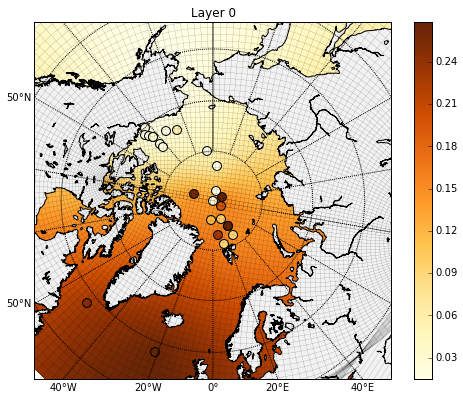

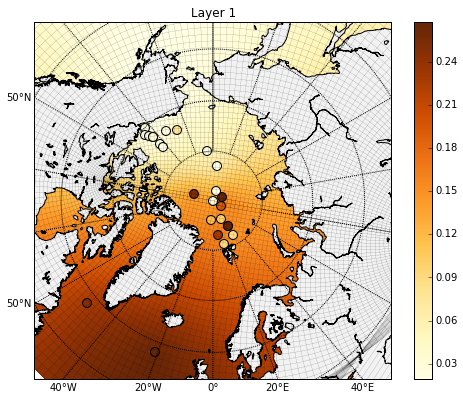

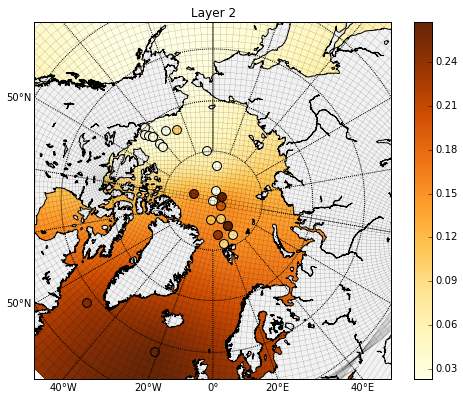

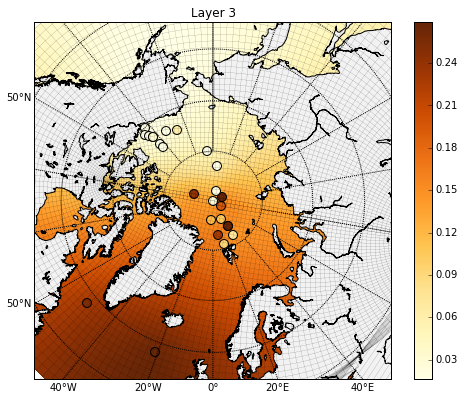

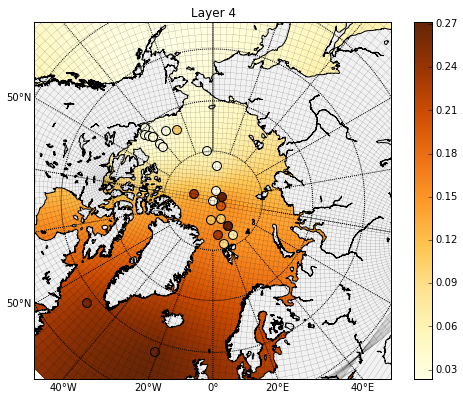

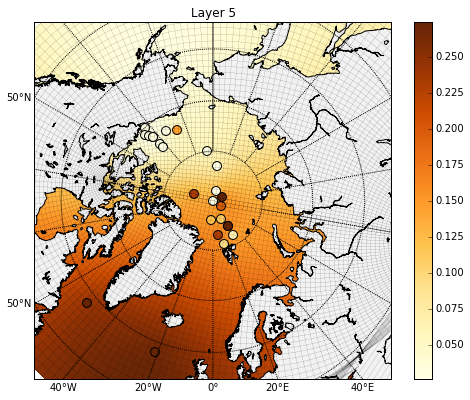

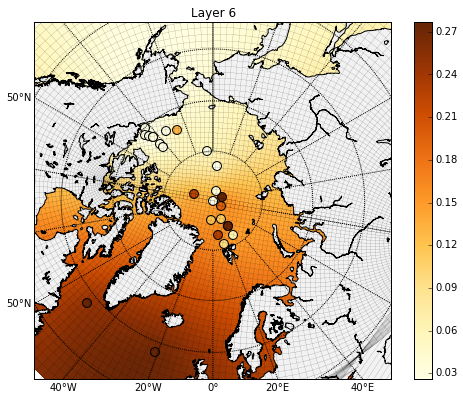

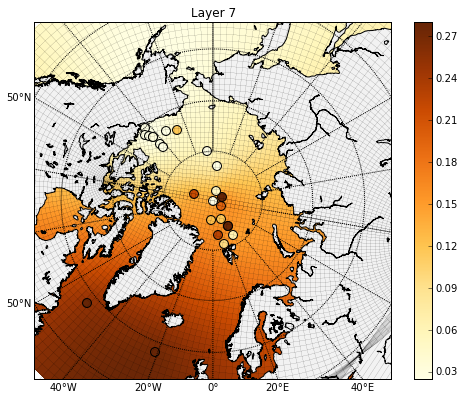

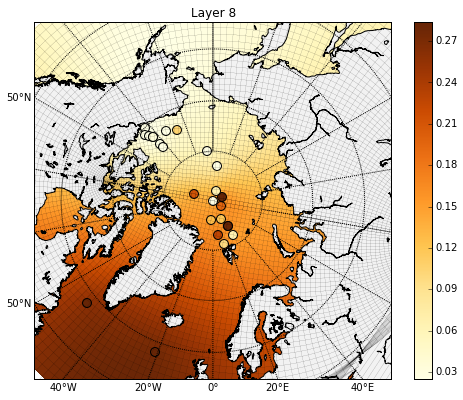

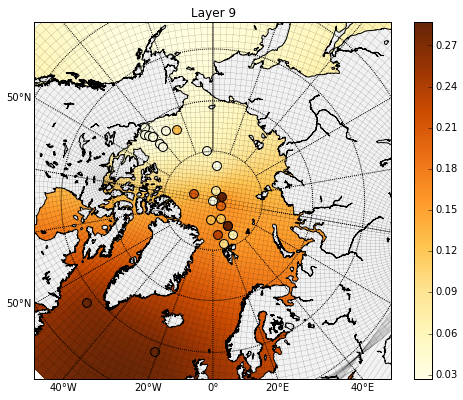

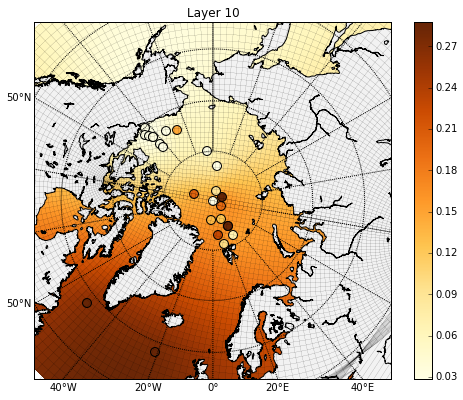

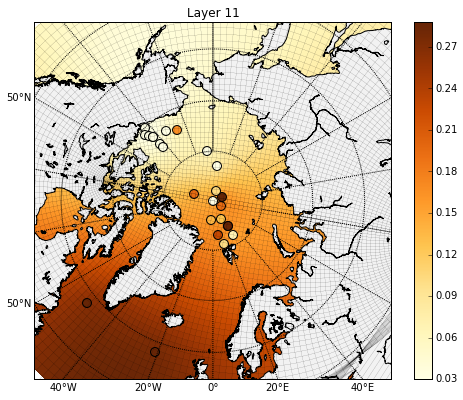

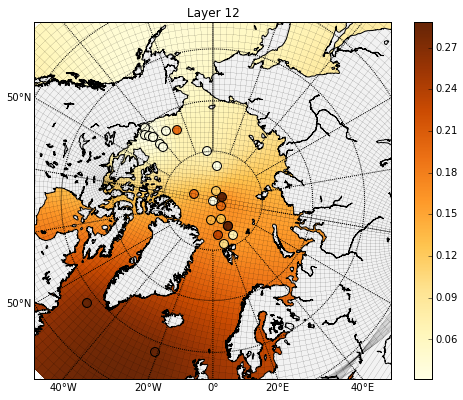

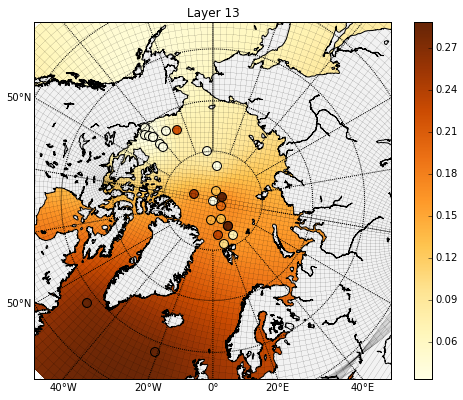

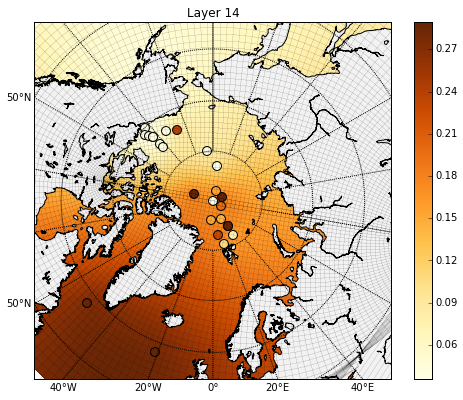

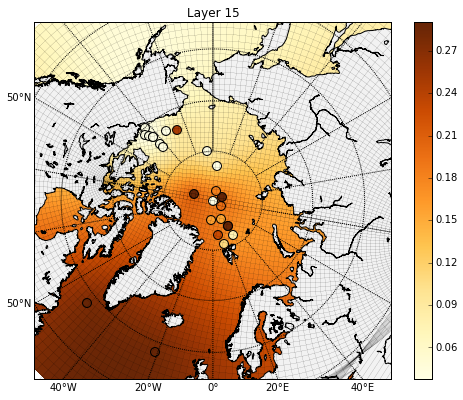

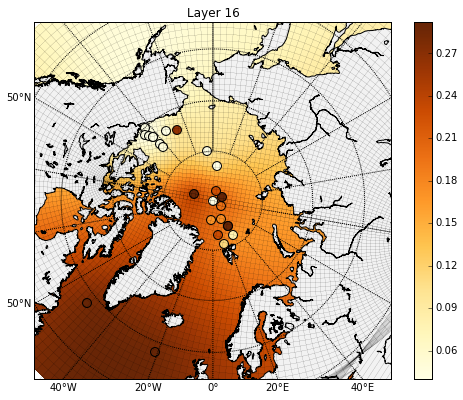

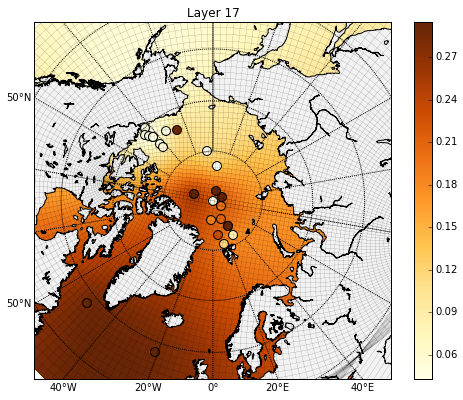

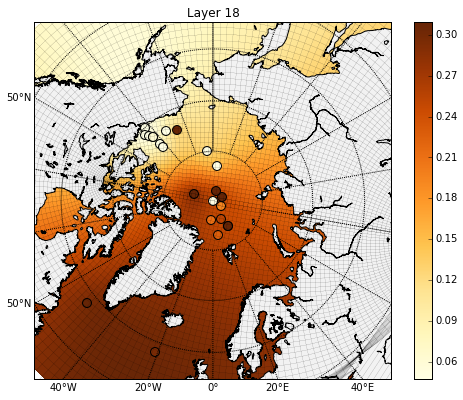

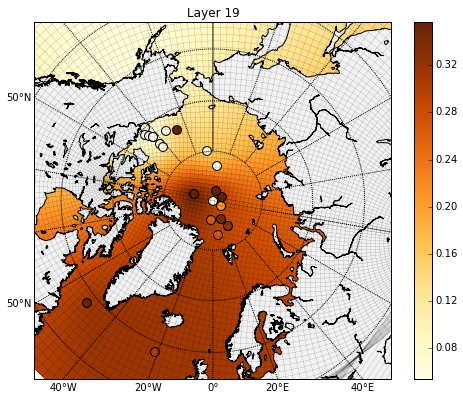

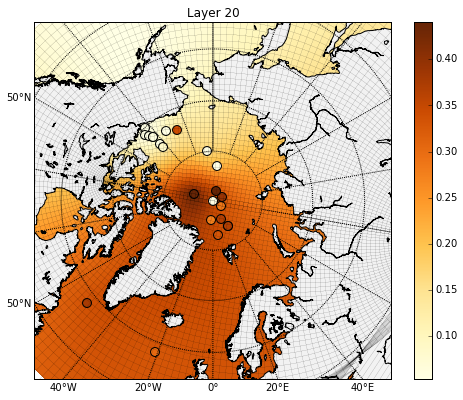

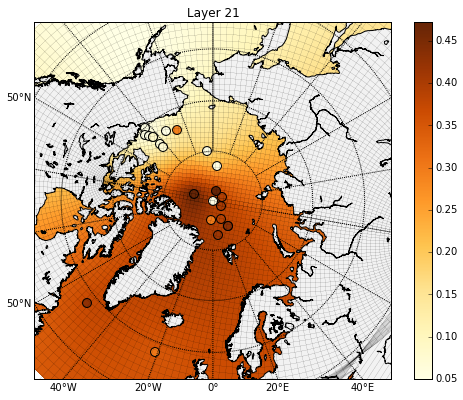

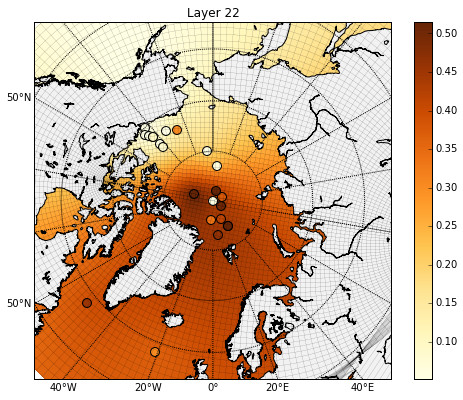

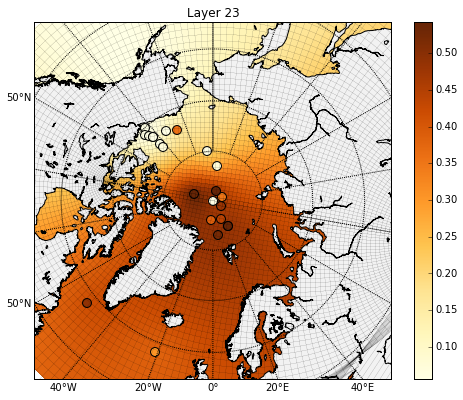

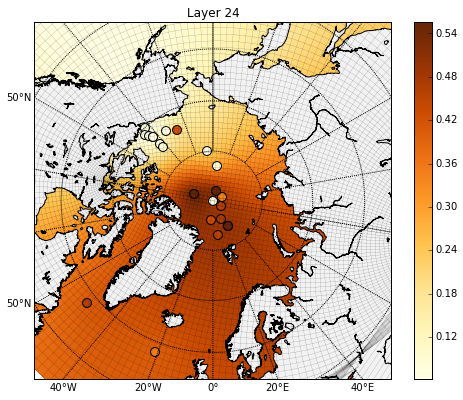

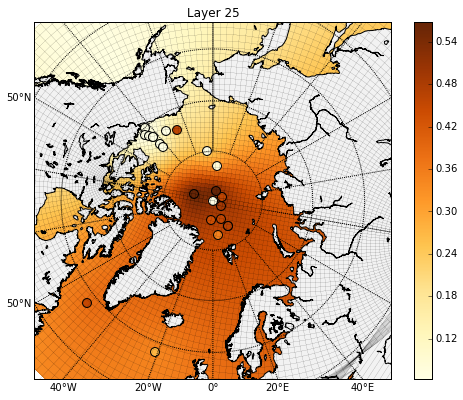

In [10]:
for i in range(26):
    write_nc(i)

#write the nc file

In [11]:
lat = nav_lat
lon = nav_lon
print lat.shape
xmax = lat.shape[1]
ymax = lat.shape[0]
depthtmax = NEMO_dep.shape[0]
print depthtmax
nemo = nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/data_Th_diss.nc', 'w')
nemo.description = 'Initial diss. Th value' 

# dimensions
nemo.createDimension('x', xmax)
nemo.createDimension('y', ymax)
nemo.createDimension('deptht',depthtmax)
nemo.createDimension('time_counter', None)

# variables
# latitude and longitude
nav_lat = nemo.createVariable('nav_lat','float32',('y','x'),zlib=True)
nav_lat = lat
x = nemo.createVariable('nav_lon','float32',('y','x'),zlib=True)
nav_lon = lon
# time
time_counter = nemo.createVariable('time_counter', 'float32', ('time_counter'),zlib=True)
time_counter.units = 'non-dim'
time_counter[0] = 1
# runoff
Pa = nemo.createVariable('Th_diss', 'float32', ('time_counter','deptht','y','x'), zlib=True)
Pa._units = 'arbitrary'
Pa[:,:,:,:]=Pa_ini[:,:,:,:]
nemo.close()

(149, 182)
31


In [12]:
import glob,csv
nc_filename=glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/data_Th_diss.nc')
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/data_Th_diss.nc']


In [13]:
ptrc=nc.Dataset(nc_filename[0])
print ptrc.variables

OrderedDict([(u'nav_lat', <netCDF4.Variable object at 0x7f4170a98478>), (u'nav_lon', <netCDF4.Variable object at 0x7f4170a98e90>), (u'time_counter', <netCDF4.Variable object at 0x7f4170a98c30>), (u'Th_diss', <netCDF4.Variable object at 0x7f4170a989d0>)])


In [14]:
Pa_diss=ptrc.variables['Th_diss'][:]
print (Pa_diss-Pa_ini)

[[[[ -4.19185980e-09  -3.36576683e-10  -6.01423228e-09 ...,
      1.99098571e-10  -4.19185980e-09  -3.36576683e-10]
   [ -5.45405002e-09   3.54200688e-09   7.38510769e-09 ...,
      4.42167961e-09  -5.45405002e-09   3.54200688e-09]
   [ -5.86311075e-09   3.23181418e-09  -5.64272482e-09 ...,
     -2.96927982e-09  -5.86311075e-09   3.23181418e-09]
   ..., 
   [ -5.12456388e-09  -6.46281012e-09  -9.49316098e-10 ...,
     -5.12709039e-09  -5.12456388e-09  -6.46281012e-09]
   [ -4.84662127e-09  -5.09424658e-09  -4.84662127e-09 ...,
      3.56327551e-10  -4.84662127e-09  -5.09424658e-09]
   [ -9.49316098e-10  -6.46281012e-09  -5.12456388e-09 ...,
     -2.54401239e-09  -9.49316098e-10  -6.46281012e-09]]

  [[ -5.11516565e-09  -4.58989652e-09  -2.64026473e-09 ...,
      2.96958319e-10  -5.11516565e-09  -4.58989652e-09]
   [ -6.32090486e-09   4.82676329e-09   2.43754569e-09 ...,
     -5.31423242e-09  -6.32090486e-09   4.82676329e-09]
   [ -3.99396805e-09  -1.94429486e-09  -1.03539258e-09 ...,
 